In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

/home/romain/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


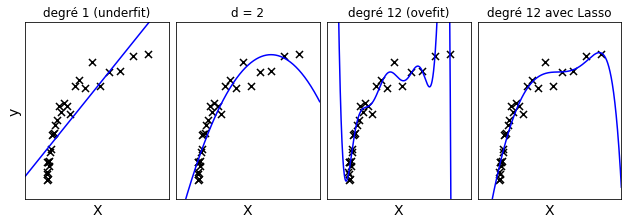

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso


def generating_func(x, err=0.5):
    return np.random.normal(10 - 1. / (x + 0.1), err)


n_samples = 30

np.random.seed(0)
x = 10**np.linspace(-2, 0, n_samples)
y = generating_func(x)

x_test = np.linspace(-0.2, 1.2, 1000)

titles = [
    'degré 1 (underfit)', 'd = 2', 'degré 12 (ovefit)', 'degré 12 avec Lasso'
]
degrees = [1, 2, 10, 10]

fig = plt.figure(figsize=(9, 3.5))
fig.subplots_adjust(left=0.06, right=0.98, bottom=0.15, top=0.85, wspace=0.05)

for i, d in enumerate(degrees):
    ax = fig.add_subplot(141 + i, xticks=[], yticks=[])
    ax.scatter(x, y, marker='x', c='k', s=50)

    if i != 3:
        model = make_pipeline(
            PolynomialFeatures(d), StandardScaler(), LinearRegression())
    else:
        model = make_pipeline(PolynomialFeatures(d), StandardScaler(), Lasso(alpha=0.005))
    model.fit(x[:, np.newaxis], y)
    ax.plot(x_test, model.predict(x_test[:, np.newaxis]), '-b')

    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(0, 12)
    ax.set_xlabel('X')
    if i == 0:
        ax.set_ylabel('y')

    ax.set_title(titles[i])

/home/romain/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



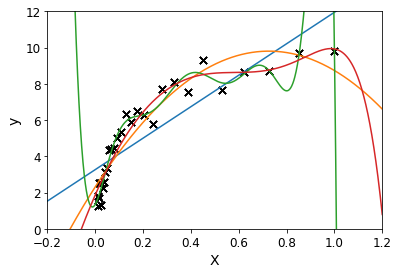

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso


def generating_func(x, err=0.5):
    return np.random.normal(10 - 1. / (x + 0.1), err)


n_samples = 30

np.random.seed(0)
x = 10**np.linspace(-2, 0, n_samples)
y = generating_func(x)

x_test = np.linspace(-0.2, 1.2, 1000)

labels = [
    'degré 1 (underfit)', 'd = 2', 'degré 12 (ovefit)', 'degré 12 avec Lasso'
]
degrees = [1, 2, 10, 10]

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)

for i, d in enumerate(degrees):
    ax.scatter(x, y, marker='x', c='k', s=50)

    if i != 3:
        model = make_pipeline(
            PolynomialFeatures(d), StandardScaler(), LinearRegression())
    else:
        model = make_pipeline(PolynomialFeatures(d), StandardScaler(), Lasso(alpha=0.005))
    model.fit(x[:, np.newaxis], y)
    ax.plot(x_test, model.predict(x_test[:, np.newaxis]), label=labels[i])

ax.set_xlim(-0.2, 1.2)
ax.set_ylim(0, 12)
ax.set_xlabel('X')
ax.set_ylabel('y')
# ax.legend()
plt.show()